<a href="https://www.kaggle.com/code/badr2211/autimated-eda-tested-in-churn-data-set?scriptVersionId=147854211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


**Load data**

In [87]:

def load_data (path):
    extention =path.split('.')[-1]
    if extention == 'csv':
       data = pd. read_csv(path)
    elif extention == 'json' :
       data = json.load(path)
    elif extention == 'txt' :
       with open(file_path, 'r') as file:
            data = file.read()
    elif extention == 'db':
        conn = sqlite3.connect(file_path)
        query = "SELECT * FROM ;"
        data = pd.read_sql(query, conn)
        conn.close()
    else:
        raise ValueError("Unsupported file extension")
    return data

In [88]:
#path = '/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv'
path=input()
data = load_data(path)

 /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


deep dive into data

In [89]:
def basic_info(data):
    print('we have '+str(data.shape[0])+' sample ,and '+str(data.shape[1])+' feature\n')
    
    return (data.info() ,data.describe(), data.head())

info ,statistc ,head =basic_info(data)

#data.describe()


we have 7043 sample ,and 21 feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [90]:
statistc

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [91]:
head

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
data[data.columns[data.isnull().any()]]
#data[data.columns[data.isnull().any()]].isnull().sum()
#if data[data.columns[data.isnull().any()]].isnull().sum()> 1/9:
#    print('true')
data.columns[data.isnull().any()].dtype

#data_imputed = data.fillna(data.mean())

dtype('O')

In [93]:
for i in data.columns:
    print(i)
data[i].dtype

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


dtype('O')

**handeling data**


handel missing value 
and dupplicated

In [94]:
def check(df,df_ID):
    print(data.isnull().sum())
    if data.isnull().sum() .sum() == 0:
        print ('\nNO Null Value')
    else :
        print('\nWarning :Null value ,deal with it')
        for c in data.columns :
            print(c)
            if data[c].dtype !='object' :
                print(c)
                if data[c].isna().sum()> data.shape[0]/4:
                    #print(c,'n')
                    data[c].dropna()
                elif data[c].isna().sum()==0:
                    continue
                else :
                    #print(c,'else')
                    data[c].fillna(data[c].mean(),inplace=True)
            else :
                if data[c] .isna().sum()>0:
                    mode_category = data[c].mode()[0] 
                    data[c].fillna(value=mode_category, inplace=True)
                    
        print(data.isnull().sum())
    if df_ID.is_unique:
        print('\nSample is unique no duplicated')
        
    else :
        print('\ndupplicated , deal with it ...')
        data_unique = data.drop_duplicates(keep='first')
    
    return data

In [95]:
data=check(data,data.index)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NO Null Value

Sample is unique no duplicated


**EDA**

deep dive inot each feature 

In [96]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

In [97]:
uniq(data)

,val,types,len
feature,,,
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",object,7043
gender,"[Female, Male]",object,2
SeniorCitizen,"[0, 1]",int64,2
Partner,"[Yes, No]",object,2
Dependents,"[No, Yes]",object,2
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",int64,73
PhoneService,"[No, Yes]",object,2
MultipleLines,"[No phone service, No, Yes]",object,3
InternetService,"[DSL, Fiber optic, No]",object,3


In [98]:
def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data)
cat_feature

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [99]:
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data)
num_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges']

**visulaization**

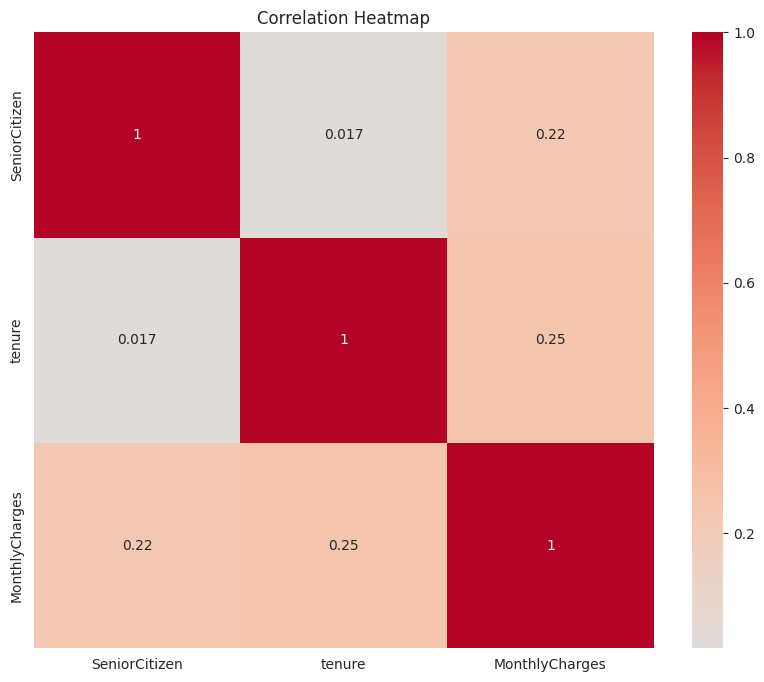

In [100]:
def corr(data):
        numeric_columns = data.select_dtypes(exclude=['object']).columns
        corr_matrix= data[numeric_columns].corr()

    
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()
    
corr(data)

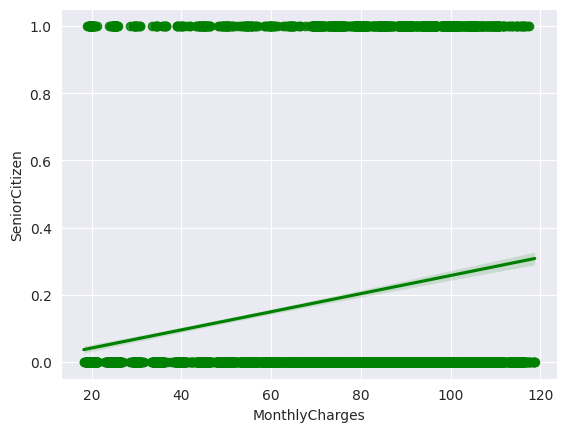

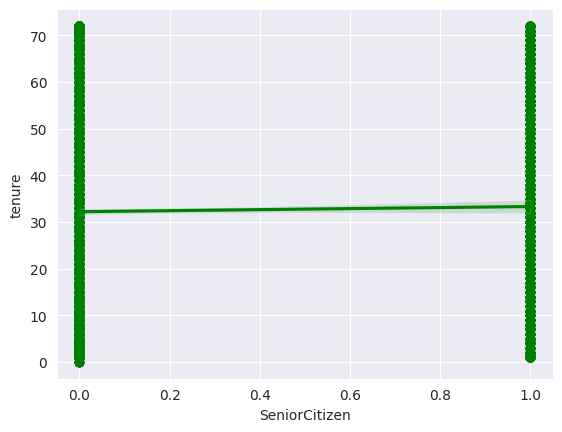

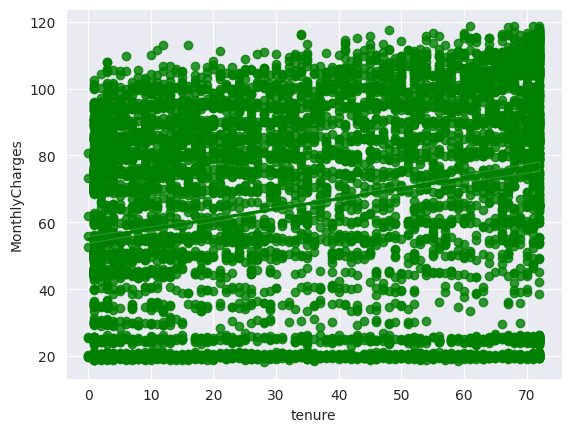

<Figure size 640x480 with 0 Axes>

In [101]:
import seaborn as sns
def scatter(data,num_feature):
#_,ax = plt.subplots(3,3,figsize=(12,4))
    for i in range(0,len(num_feature)):
        sns.regplot(x=num_feature[i-1], y=num_feature[i], data=data,color='green')
        #data.plot.scatter(x=num_feature[i-1],y=num_feature[i])  
        plt.show()
        plt.tight_layout()
        #plt.show()
    
scatter(data,num_feature)

SeniorCitizen
tenure
MonthlyCharges


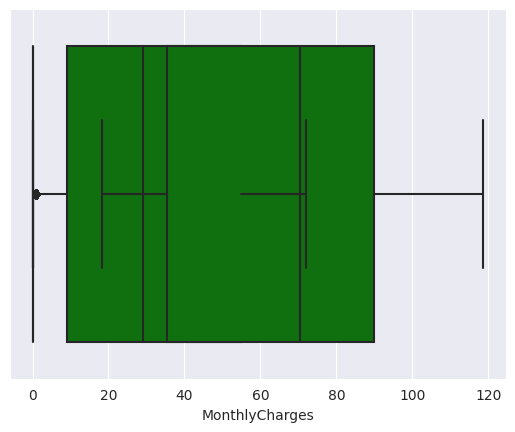

In [102]:
for i in num_feature:
    print(i)
    sns.boxplot(x=data[i],color='green')

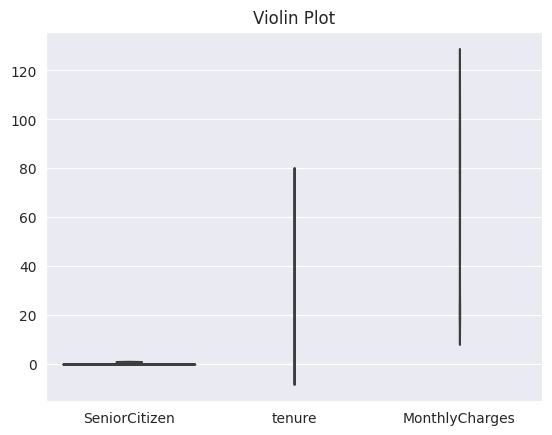

In [103]:
sns.violinplot(data, inner="stick")
plt.title('Violin Plot')
plt.show()

In [104]:
def box(data,cat_feature,target):
    if target.dtype  !='object':
        fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        for i, f in enumerate(cat_feature):
            row = i // 3  # Row index of the subplot
            col = i % 3  # Column index of the subplot
            sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])
        for i in range(len(cat_feature), len(axes.ravel())):
            fig.delaxes(axes.ravel()[i])

        plt.tight_layout()  # Adjust subplot spacing
        plt.show()

    
box(data,cat_feature,data.iloc[:,-1])

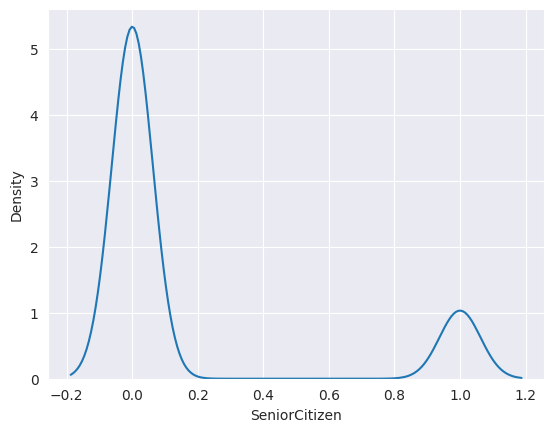

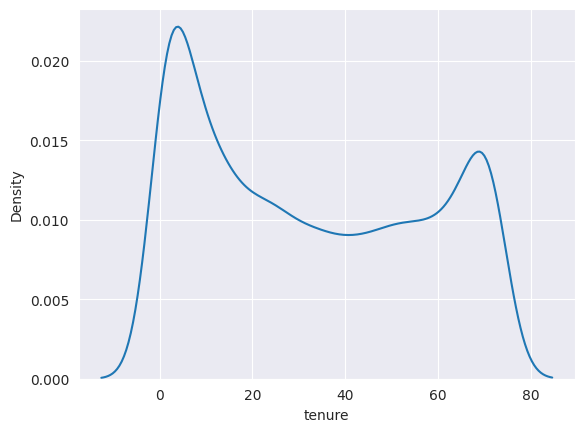

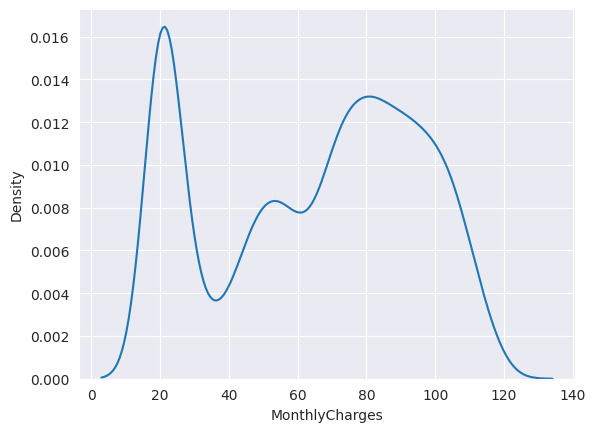

In [105]:
for f in num_feature :
    sns.kdeplot(x=f,data=data,)
    plt.show()

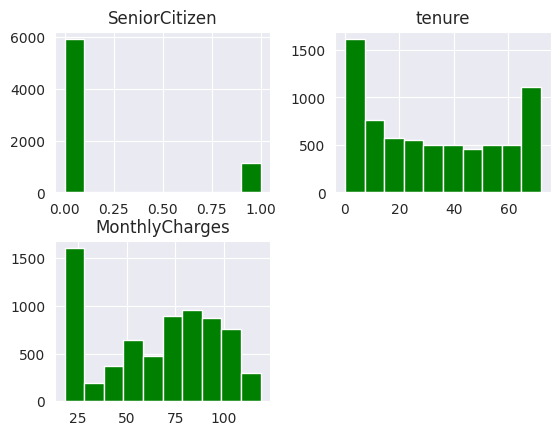

In [106]:
data.hist(color='g')
plt.title('Histogram')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


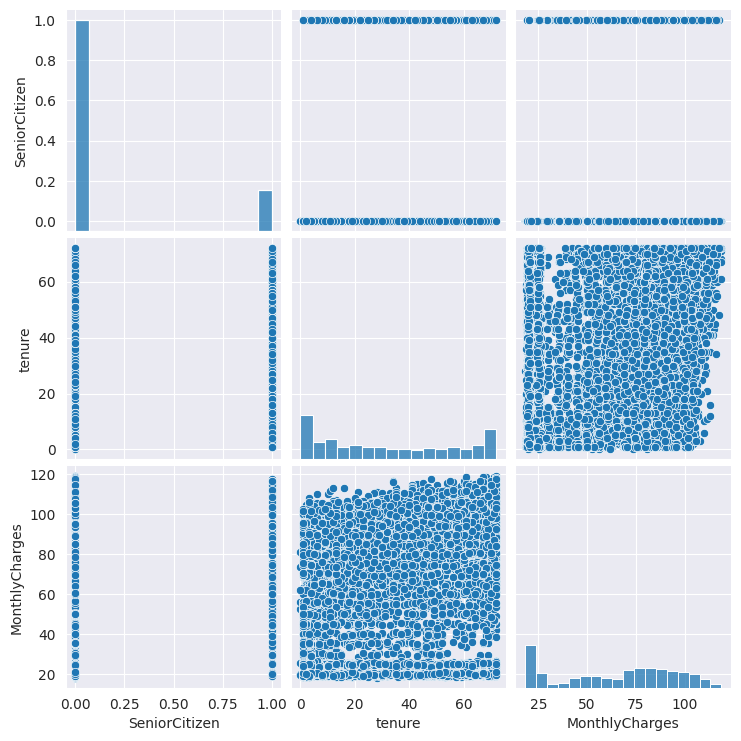

In [107]:
sns.set_style("darkgrid")
sns.pairplot(data)

In [108]:
df_dummy=pd.get_dummies(data)

In [109]:
df_dummy .head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [110]:
from sklearn.preprocessing import LabelBinarizer

# Create a LabelBinarizer instance
label_binarizer = LabelBinarizer()

# Fit and transform the labels into binary format
for c in cat_feature:
    data[c] = label_binarizer.fit_transform(data[c])



In [111]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in [num_feature]:
    data[col] = mms.fit_transform(data[col])

In [112]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0.0,1,0,0.013889,0,0,1,1,...,1,1,1,1,1,1,0,0.115423,0,0
1,0,1,0.0,0,0,0.472222,1,1,1,0,...,0,1,1,1,0,0,0,0.385075,0,0
2,0,1,0.0,0,0,0.027778,1,1,1,0,...,1,1,1,1,1,1,0,0.354229,0,1
3,0,1,0.0,0,0,0.625000,0,0,1,0,...,0,0,1,1,0,0,1,0.239303,0,0
4,0,0,0.0,0,0,0.027778,1,1,0,1,...,1,1,1,1,1,1,0,0.521891,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0.0,1,1,0.333333,1,0,1,0,...,0,0,0,0,0,1,0,0.662189,0,0
7039,0,0,0.0,1,1,1.000000,1,0,0,1,...,0,1,0,0,0,1,0,0.845274,0,0
7040,0,0,0.0,1,1,0.152778,0,0,1,0,...,1,1,1,1,1,1,0,0.112935,0,0
7041,0,1,1.0,1,0,0.055556,1,0,0,1,...,1,1,1,1,1,1,0,0.558706,0,1
